### This Notebook Showcases all of the Visualizations for our Dashboard

In [20]:
from reddit_scraper import RedditScraper
from dash import dcc
import plotly.express as px
import matplotlib.pyplot as plt
from models import Model

In [3]:
scraper = RedditScraper()

In [4]:
df = scraper.scrape_subreddit_submissions("UIUC")

In [5]:
df.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,lypvic,1.614991e+09,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,270,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...
1,1859gzi,1.701109e+09,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,22,1.00,1,https://www.reddit.com/r/UIUC/comments/1859gzi...
2,18a359k,1.701637e+09,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,70,0.96,35,https://www.reddit.com/r/UIUC/comments/18a359k...
3,18a8bj6,1.701651e+09,hello kitty necklace,i left my necklace on the squat rack at arc an...,urcreeper_,14,0.90,1,https://www.reddit.com/r/UIUC/comments/18a8bj6...
4,18aa3m3,1.701657e+09,Can you spare a minute to help this campaign?,,CuPride,8,0.84,0,https://chng.it/N6nk6Rmd6v


### Visualization 1 - Word Cloud

In [25]:
from wordcloud import WordCloud
from PIL import Image
from nltk.corpus import stopwords

nltk.download('stopwords')

def generate_wordcloud(df_):
    vocab = df_.dropna()['text'].str.replace(r'\?|\.|\'', ' ')
    vocab = ' '.join(vocab)
    vocab = ' '.join([i for i in vocab.split(' ') if i not in stopwords.words('english')])
    wc = WordCloud().generate(vocab)
    plt.imshow(wc)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


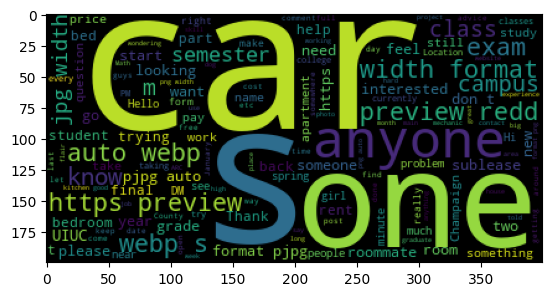

In [26]:
generate_wordcloud(df)

In [21]:

model = Model()
model.select_model('VADER')
df_polarity = model.get_polarity_scores(df)
df_polarity.head()

,neg,neu,pos,compound,id,sentiment,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,0.059,0.881,0.060,0.2617,lypvic,Positive,1.614991e+09,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,270,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...
1,0.037,0.928,0.035,-0.0258,1859gzi,Neutral,1.701109e+09,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,22,1.00,1,https://www.reddit.com/r/UIUC/comments/1859gzi...
2,0.052,0.894,0.054,-0.2152,18a359k,Negative,1.701637e+09,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,70,0.96,35,https://www.reddit.com/r/UIUC/comments/18a359k...
3,0.163,0.758,0.079,-0.5307,18a8bj6,Negative,1.701651e+09,hello kitty necklace,i left my necklace on the squat rack at arc an...,urcreeper_,14,0.90,1,https://www.reddit.com/r/UIUC/comments/18a8bj6...
4,0.000,0.000,0.000,0.0000,18aa3m3,Neutral,1.701657e+09,Can you spare a minute to help this campaign?,,CuPride,8,0.84,0,https://chng.it/N6nk6Rmd6v


In [31]:
df.head()

,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,1.614991e+09,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,264,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...
1,1.701109e+09,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,21,0.97,1,https://www.reddit.com/r/UIUC/comments/1859gzi...
2,1.701637e+09,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,64,0.94,34,https://www.reddit.com/r/UIUC/comments/18a359k...
3,1.701651e+09,hello kitty necklace,i left my necklace on the squat rack at arc an...,urcreeper_,15,0.94,1,https://www.reddit.com/r/UIUC/comments/18a8bj6...
4,1.701657e+09,Can you spare a minute to help this campaign?,,CuPride,8,0.90,0,https://chng.it/N6nk6Rmd6v
